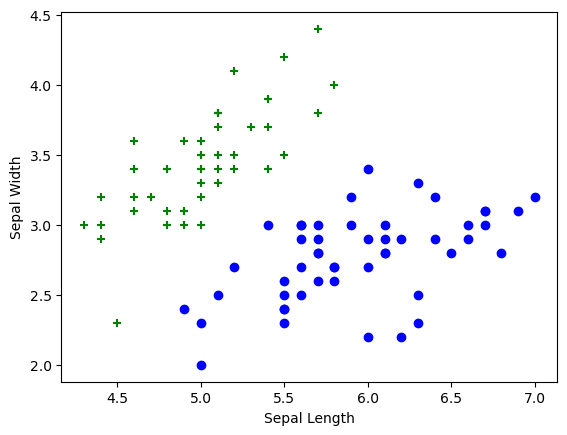

In [30]:
import pandas as pd 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

iris = load_iris() 
iris.feature_names
iris.target_names

df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

df['target'] = iris.target
df.head

df[df.target==1].head()
df[df.target==2].head()

df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = "green", marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = "blue", marker = 'o')


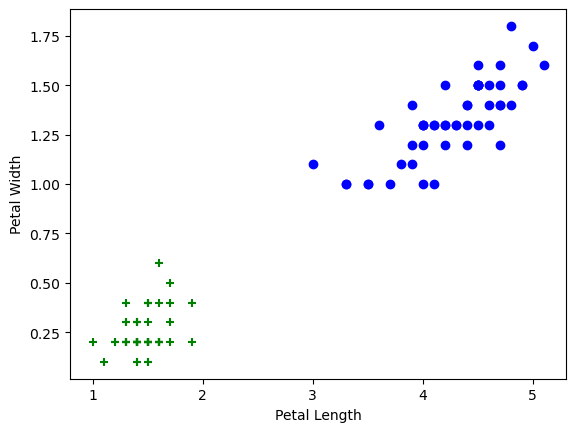

In [31]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = "green", marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = "blue", marker = 'o')

In [32]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
len(X_train)
len(X_test)

model = SVC()
model.fit(X_train, y_train)



SVC()

In [33]:
model.score(X_test, y_test)


0.9666666666666667

In [34]:
model.predict([[4.8,3.0,1.5,0.3]])


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [35]:
#Regularization

model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)


0.9666666666666667

In [36]:
#Gamma

model_g = SVC(C=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)



0.9666666666666667

In [37]:
#Kernal

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = ", cm)

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Confusion Matrix =  [[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]
Accuracy: 97.50 %
Standard Deviation: 5.34 %
